In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import h5py
import torch

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
np.set_printoptions(precision=2, suppress=False)

cuda:0


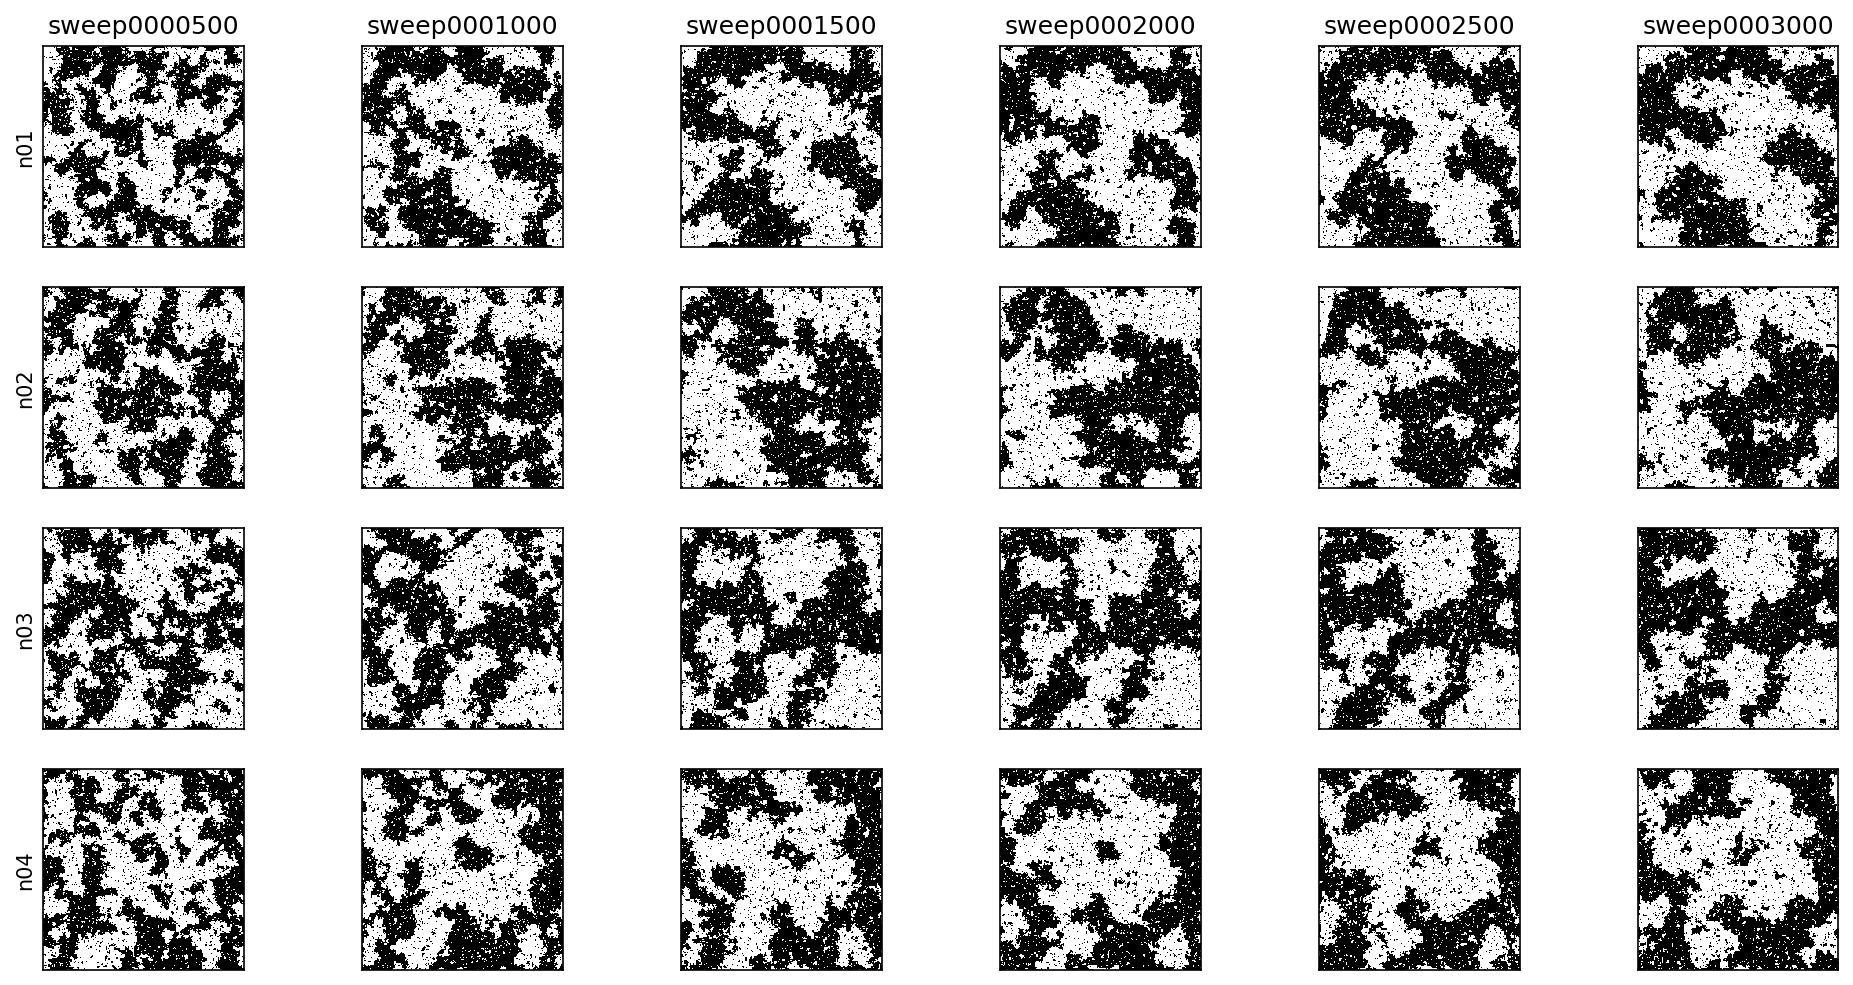

In [2]:
from tqdm import tqdm
from glob import glob
import json
import os

data_dir = '/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data'
folders = sorted(glob(f'{data_dir}/n*'))

fig, ax = plt.subplots(4,6, dpi=150, figsize=(16,8))

for i in range(4):
    data_files = sorted(glob(f'{folders[i]}/sweep*.npy'))
    for j in range(6):
        frame_num = j + 1
        data = np.load(data_files[frame_num], mmap_mode='r')
        ax[i,j].imshow(data, cmap='Greys', interpolation='None', vmin=-1, vmax=1)
        ax[i,j].set(xticks=[], yticks=[])
        
        ax[0,j].set_title(os.path.basename(data_files[frame_num])[:-4])
    ax[i,0].set_ylabel(os.path.basename(folders[i]))

x (256, 256)
y (256, 256)
dt 1
t (10,)
phi torch.Size([10, 1, 256, 256])


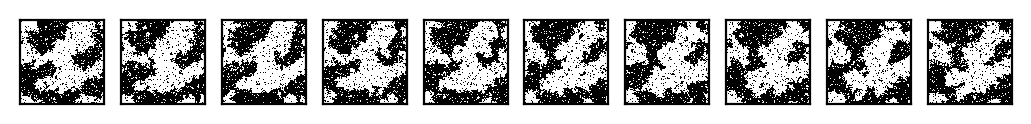

In [3]:
from forecasting_dataset import SimulationDataset

ds = SimulationDataset(f'{data_dir}/n01')

sample = ds[5]
for key in sample:
    try:
        print(key, sample[key].shape)
    except:
        print(key, sample[key])

fig, ax = plt.subplots(1, len(sample['t']), dpi=200)

for i in range(len(ax)):
    ax[i].pcolormesh(sample['x'], sample['y'], sample['phi'][i].squeeze(), cmap='Greys')
    ax[i].set(xticks=[], yticks=[], aspect='equal')

In [4]:
from forecasting_nn import SimulationForecasting

loader = torch.utils.data.DataLoader(ds, batch_size=1, num_workers=0)
sample = next(iter(loader))

model = SimulationForecasting()
model.batch_step(sample)

tensor(0.7721, grad_fn=<BinaryCrossEntropyBackward0>)